In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

## Load Partial Model

In [31]:
from prophet.serialize import model_to_json, model_from_json

with open('Partial_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

## Load processed Future Data

In [32]:
future_df = pd.read_csv('processed_future_data.csv')

In [33]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [35]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [36]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [37]:
future_df['cap'] = 6000

## Make predictions on Future Data

In [38]:
predictions = saved_mv_model.predict(future_df)

In [39]:
predictions

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,5999.996036,6000,6067.207525,8276.422498,5999.995684,5999.996389,1149.767946,1149.767946,1149.767946,...,-11.063921,-11.063921,-11.063921,283.650179,283.650179,283.650179,0.0,0.0,0.0,7149.763981
1,2022-06-13 00:15:00,5999.996036,6000,6123.104768,8246.502371,5999.995684,5999.996389,1137.630243,1137.630243,1137.630243,...,-11.063921,-11.063921,-11.063921,284.645453,284.645453,284.645453,0.0,0.0,0.0,7137.626278
2,2022-06-13 00:30:00,5999.996036,6000,6038.688320,8205.852910,5999.995685,5999.996389,1129.563319,1129.563319,1129.563319,...,-11.063921,-11.063921,-11.063921,285.641535,285.641535,285.641535,0.0,0.0,0.0,7129.559355
3,2022-06-13 00:45:00,5999.996036,6000,6000.630804,8263.894909,5999.995685,5999.996390,1125.299453,1125.299453,1125.299453,...,-11.063921,-11.063921,-11.063921,286.638423,286.638423,286.638423,0.0,0.0,0.0,7125.295490
4,2022-06-13 01:00:00,5999.996037,6000,5928.641902,8105.710561,5999.995685,5999.996390,1047.207947,1047.207947,1047.207947,...,-11.063921,-11.063921,-11.063921,287.636116,287.636116,287.636116,0.0,0.0,0.0,7047.203984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,5999.996392,6000,3277.689778,5449.392481,5999.996059,5999.996729,-1632.214136,-1632.214136,-1632.214136,...,-134.641833,-134.641833,-134.641833,1833.487461,1833.487461,1833.487461,0.0,0.0,0.0,4367.782255
1341,2022-06-26 23:15:00,5999.996392,6000,3251.614842,5462.773272,5999.996059,5999.996729,-1660.833200,-1660.833200,-1660.833200,...,-134.641833,-134.641833,-134.641833,1834.337461,1834.337461,1834.337461,0.0,0.0,0.0,4339.163192
1342,2022-06-26 23:30:00,5999.996392,6000,3153.678637,5420.500737,5999.996059,5999.996729,-1685.751623,-1685.751623,-1685.751623,...,-134.641833,-134.641833,-134.641833,1835.186335,1835.186335,1835.186335,0.0,0.0,0.0,4314.244769
1343,2022-06-26 23:45:00,5999.996392,6000,3212.896413,5340.307378,5999.996060,5999.996729,-1706.560943,-1706.560943,-1706.560943,...,-134.641833,-134.641833,-134.641833,1836.034082,1836.034082,1836.034082,0.0,0.0,0.0,4293.435450


In [40]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [41]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,7149.763981,6067.207525,8276.422498
1,2022-06-13 00:15:00,7137.626278,6123.104768,8246.502371
2,2022-06-13 00:30:00,7129.559355,6038.688320,8205.852910
3,2022-06-13 00:45:00,7125.295490,6000.630804,8263.894909
4,2022-06-13 01:00:00,7047.203984,5928.641902,8105.710561
...,...,...,...,...
1340,2022-06-26 23:00:00,4367.782255,3277.689778,5449.392481
1341,2022-06-26 23:15:00,4339.163192,3251.614842,5462.773272
1342,2022-06-26 23:30:00,4314.244769,3153.678637,5420.500737
1343,2022-06-26 23:45:00,4293.435450,3212.896413,5340.307378


## Plot Predictions

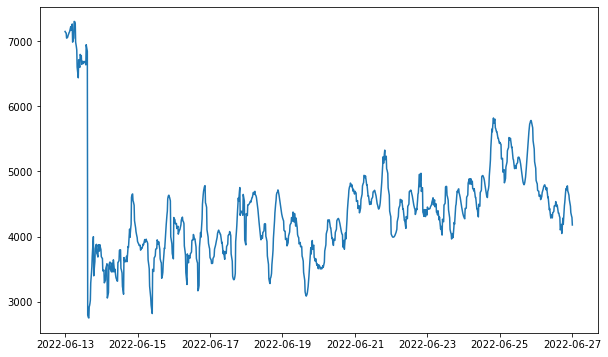

In [42]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])